# Testing models

In [2]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# imoprt seaborn & matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# import KNN from sklearn
from sklearn.neighbors import KDTree

# shows a bigger plot size for readability 
plt.rcParams['figure.figsize'] = (12, 5)
#improve resolution
%config InlineBackend.figure_format ='retina'

In [3]:
# read 'songDb.tsv' into dataframe with correct encoding  
music = pd.read_csv('songDb.tsv', sep='\t', encoding='ISO-8859-1')

C:\Users\David Soberanis\AppData\Local\Temp\ipykernel_18216\3079004086.py:2: DtypeWarning: Columns (11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  music = pd.read_csv('songDb.tsv', sep='\t', encoding='ISO-8859-1')


# Missing Data

- As we can see the only column with a significant amount of missing data is Genre at 0.000198. We just need to drop rows with these missing genres 

In [4]:
# Grouping Genres 

base = "genre_dataset.txt"
with open(base) as b:
    lines = b.read().splitlines()
split = np.array(lines)
split[:10]
df = pd.DataFrame(split, columns = ['genres'])
df.loc[df['genres'].str.contains('rock')] = 'Rock'
df.loc[df['genres'].str.contains('hip hop')] = 'Rap'
df.loc[df['genres'].str.contains('country')] = 'Country'
df.loc[df['genres'].str.contains('rap')] = 'Rap'
df.loc[df['genres'].str.contains('r&b')] = 'R&B'
df.loc[df['genres'].str.contains('folk')] = 'Folk'
df.loc[df['genres'].str.contains('acoustic')] = 'Acoustic'
df.loc[df['genres'].str.contains('core')] = 'Punk'
df.loc[df['genres'].str.contains('jazz')] = 'Jazz'
df.loc[df['genres'].str.contains('metal')] = 'Metal'
df.loc[df['genres'].str.contains('edm')] = 'Electronic'
df.loc[df['genres'].str.contains('electronic')] = 'Electronic'
df.loc[df['genres'].str.contains('house')] = 'Electronic'
df.loc[df['genres'].str.contains('industrial')] = 'Electronic'
df.loc[df['genres'].str.contains('glitch')] = 'Electronic'
df.loc[df['genres'].str.contains('idm')] = 'Electronic'
df.loc[df['genres'].str.contains('techno')] = 'Electronic'
df.loc[df['genres'].str.contains('garage')] = 'Electronic'
df.loc[df['genres'].str.contains('reggeaton')] = 'Electronic'
df.loc[df['genres'].str.contains('soul')] = 'Soul'
df.loc[df['genres'].str.contains('pop')] = 'Pop'
df.loc[df['genres'].str.contains('funk')] = 'Funk'
df.loc[df['genres'].str.contains('reggae')] = 'reggae'
df.loc[df['genres'].str.contains('punk')] = 'Punk'
df.loc[df['genres'].str.contains('classical')] = 'Classical'
df.loc[df['genres'].str.contains('indie')] = 'Indie'
df.loc[df['genres'].str.contains('ambient')] = 'Ambient'
df.loc[df['genres'].str.contains('grunge')] = 'Punk'
df.loc[df['genres'].str.contains('gospel')] = 'Gospel'
df.loc[df['genres'].str.contains('latin')] = 'Latin'
df.loc[df['genres'].str.contains('grime')] = 'Rap'
df.loc[df['genres'].str.contains('trap')] = 'Rap'
df.loc[df['genres'].str.contains('americana')] = 'Folk'
df.loc[df['genres'].str.contains('bluegrass')] = 'Blues'
df.loc[df['genres'].str.contains('blues')] = 'Blues'
df.loc[df['genres'].str.contains('roots')] = 'Blues'
df.loc[df['genres'].str.contains('dance')] = 'Dance'
df.loc[df['genres'].str.contains('children')] = 'Children'
df.loc[df['genres'].str.contains('synth')] = 'Electronic'
df.loc[df['genres'].str.contains('future')] = 'Dance'
df.loc[df['genres'].str.contains('piano')] = 'Classical'
df.loc[df['genres'].str.contains('funk')] = 'Funk'
df.loc[df['genres'].str.contains('prog')] = 'Rock'
df.loc[df['genres'].str.contains('death')] = 'Metal'
df.loc[df['genres'].str.contains('gaze')] = 'Rock'
df.loc[df['genres'].str.contains('sing')] = 'Vocals'
df.loc[df['genres'].str.contains('dubstep')] = 'Electronic'
df.loc[df['genres'].str.contains('psych')] = 'Rock'
df.loc[df['genres'].str.contains('medieval')] = 'Folk'
df.loc[df['genres'].str.contains('step')] = 'dance'
df.loc[df['genres'].str.contains('choir')] = 'Vocals'
df.loc[df['genres'].str.contains('emo')] = 'Punk'
df.loc[df['genres'].str.contains('drone')] = 'Ambient'
df.loc[df['genres'].str.contains('grind')] = 'Punk'
df.loc[df['genres'].str.contains('cappella')] = 'Vocals'
df.loc[df['genres'].str.contains('orchestra')] = 'Classical'
df.loc[df['genres'].str.contains('trance')] = 'Electronic'
df.loc[df['genres'].str.contains('thrash')] = 'Metal'
df.loc[df['genres'].str.contains('alternative')] = 'Alternative'
df.loc[df['genres'].str.contains('worship')] = 'Gospel'
df.loc[df['genres'].str.contains('dubstep')] = 'Electronic'
df.loc[df['genres'].str.contains('choir')] = 'Vocals'
df.loc[df['genres'].str.contains('pipes')] = 'Classical'
df.loc[df['genres'].str.contains('idol')] = 'pop'
df.loc[df['genres'].str.contains('soundtrack')] = 'Film'
df.loc[df['genres'].str.contains('film')] = 'Film'
df.loc[df['genres'].str.contains('wave')] = 'Electronic'
df.loc[df['genres'].str.contains('poetry')] = 'Spoken Word'
df.loc[df['genres'].str.contains('spoken')] = 'Spoken Word'
df.loc[df['genres'].str.contains('electro')] = 'Electronic'
df.loc[df['genres'].str.contains('lo-fi')] = 'Alternative'
df.loc[df['genres'].str.contains('ska')] = 'Ska'



dropped = df.drop_duplicates()
df['genres'].value_counts() # shows the top 5 genres 

Rock             281
Indie            265
Pop              241
Electronic       181
Rap              179
                ... 
tin pan alley      1
operetta           1
brass band         1
barnemusikk        1
mashup             1
Name: genres, Length: 849, dtype: int64

# Cleaning and Filtering rows
- gets rid of NaN values
- removes all songs that are not in the top 5 genres
- fixes indexing 
- fixes dtypes

In [5]:
df = music # for testing

df = df.rename({'Genre':'genres'}, axis='columns') # rename to match 
df = df.dropna()

# combines subgenres into more general Genres. This function removes all genres outside of the top 5.
# You can alter this to include more than the top 5 genres
def CombineGenre(str_in):

    try:
        str_in = str_in.lower()
        str_in = str_in.strip()
        
        if 'rock' in str_in or 'prog' in str_in or 'gaze' in str_in or 'psych' in str_in:
            output = 'Rock'
        elif 'hip hop' in str_in or 'rap' in str_in or 'grime' in str_in or 'trap' in str_in:
            output = 'Rap'
        elif 'pop' in str_in:
            output = 'Pop'
        elif ('edm' in str_in or 'electronic' in str_in or 'house' in str_in or 'industrial' in str_in or 'glitch' in str_in 
                or 'idm' in str_in or 'techno' in str_in or 'garage' in str_in or 'reggeaton' in str_in or 'synth' in str_in 
                or 'dubstep' in str_in or 'trance' in str_in or 'wave' in str_in or 'electro' in str_in):
            output = 'Electronic'
        elif 'indie' in str_in:
            output = 'Indie'
        else:
            output  = np.nan
    except:
        output = np.nan
        
    return output

# applys above function to combine genres
df['genres'] = df['genres'].apply(CombineGenre)
df = df.dropna() # removes all genres that were not combined before 
df = df.reset_index() # resets the index since we removed many rows
df # shows now filtered df of music
# df['genres'].value_counts() # shows number of songs in each top 5 genres


,index,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,...,Valence,Tempo,Type,ID,Uri,Ref_Track,URL_features,Duration_ms,time_signature,genres
0,802,Milion,0.734,0.677,0.0,-4.120,0.0,0.0471,0.087000,0.000000,...,0.189,75.053,audio_features,7lDuA0zGpNONIAsrwWr4yr,spotify:track:7lDuA0zGpNONIAsrwWr4yr,https://api.spotify.com/v1/tracks/7lDuA0zGpNON...,https://api.spotify.com/v1/audio-analysis/7lDu...,158500.0,4.0,Rap
1,803,Ludanoc,0.713,0.878,1.0,-4.104,1.0,0.0513,0.016300,0.000000,...,0.725,130.039,audio_features,6BpEsWk5MjSz3s45dg9RNS,spotify:track:6BpEsWk5MjSz3s45dg9RNS,https://api.spotify.com/v1/tracks/6BpEsWk5MjSz...,https://api.spotify.com/v1/audio-analysis/6BpE...,194400.0,4.0,Rap
2,804,Milion,0.715,0.913,1.0,-4.337,0.0,0.0602,0.006860,0.000000,...,0.669,97.97,audio_features,4XNdzdcmGM8UrrJV8C1k4a,spotify:track:4XNdzdcmGM8UrrJV8C1k4a,https://api.spotify.com/v1/tracks/4XNdzdcmGM8U...,https://api.spotify.com/v1/audio-analysis/4XNd...,179999.0,4.0,Rap
3,805,12sati,0.844,0.856,6.0,-5.193,0.0,0.0453,0.172000,0.000016,...,0.947,129.994,audio_features,0QZj1doaH1iyj8ubJ9wm8F,spotify:track:0QZj1doaH1iyj8ubJ9wm8F,https://api.spotify.com/v1/tracks/0QZj1doaH1iy...,https://api.spotify.com/v1/audio-analysis/0QZj...,180923.0,4.0,Rap
4,806,PetaBrzina,0.625,0.939,7.0,-3.185,0.0,0.1350,0.270000,0.000007,...,0.794,172.016,audio_features,1RhlloW4u7N2Y4h2EOgL7q,spotify:track:1RhlloW4u7N2Y4h2EOgL7q,https://api.spotify.com/v1/tracks/1RhlloW4u7N2...,https://api.spotify.com/v1/audio-analysis/1Rhl...,210000.0,4.0,Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51957,131575,Youth,0.568,0.708,8.0,-9.960,1.0,0.0601,0.007930,0.000528,...,0.214,127.741,audio_features,5AozgGtATNJi2Yx5Vb2InS,spotify:track:5AozgGtATNJi2Yx5Vb2InS,https://api.spotify.com/v1/tracks/5AozgGtATNJi...,https://api.spotify.com/v1/audio-analysis/5Aoz...,259560.0,4.0,Rock
51958,131576,IFoundOut,0.470,0.909,4.0,-1.674,1.0,0.0546,0.061100,0.000000,...,0.607,146.986,audio_features,34XDIqYypZc3jyGRDgd5p4,spotify:track:34XDIqYypZc3jyGRDgd5p4,https://api.spotify.com/v1/tracks/34XDIqYypZc3...,https://api.spotify.com/v1/audio-analysis/34XD...,127400.0,4.0,Rock
51959,131577,Animal,0.272,0.918,11.0,-2.589,0.0,0.0625,0.000749,0.009200,...,0.530,139.574,audio_features,5MpD4w1JTHkesmjn9I8Qo5,spotify:track:5MpD4w1JTHkesmjn9I8Qo5,https://api.spotify.com/v1/tracks/5MpD4w1JTHke...,https://api.spotify.com/v1/audio-analysis/5MpD...,159627.0,4.0,Rock
51960,131578,PostBreak-UpSex,0.402,0.902,5.0,-4.115,1.0,0.0469,0.000073,0.004650,...,0.569,136.883,audio_features,77GZxme1GMNbbooEH8nHNX,spotify:track:77GZxme1GMNbbooEH8nHNX,https://api.spotify.com/v1/tracks/77GZxme1GMNb...,https://api.spotify.com/v1/audio-analysis/77GZ...,174453.0,4.0,Rock


In [6]:
feature_cols = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
                'Speechness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
                'Tempo', 'Duration_ms', 'time_signature']

df[feature_cols] = df[feature_cols].astype(np.float64)

# Create Design Matrix and Target vectors from the now filtered Df 

In [7]:
# Start by removing all columns that are not features 

feature_cols = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
                'Speechness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
                'Tempo', 'Duration_ms', 'time_signature']
target_col = 'genres'

X = df[feature_cols]
y = df[target_col]

print(f'Feature cols: {feature_cols}')
print(f'Target: {target_col}')

Feature cols: ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'time_signature']
Target: genres


In [8]:
# Create train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

Training shape: (15588, 13)
Testing shape: (36374, 13)


# More EDA

# Pipelining

In [8]:
%%time
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

# Label encoder for target (fitting it now to avoid unknown classes or different labels in testing)
le = LabelEncoder().fit(df[target_col].unique())

# KNN transformer and classifier
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)

# Pipelining
nca_pipe = Pipeline([
    ('nca', nca), 
    ('knn', knn)
])

# Fit
nca_pipe.fit(X_train, le.transform(y_train))

# Preliminary score
print(nca_pipe.score(X_test, le.transform(y_test)))

0.30164403145103647
CPU times: total: 9min 35s
Wall time: 7min 58s


# More Tests 

In [10]:
# from sklearn.svm import SVC # "Support vector classifier"
# model = SVC(kernel='linear', C=1)
# model.fit(X, y)

In [ ]:
dir(model)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_pairwise',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_sparse_pr

In [ ]:
model.score(X,y)

0.35460528848004313

In [ ]:
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(model, X, y, cv=5)

In [ ]:
cross_score

array([0.36255172, 0.33407101, 0.35459969, 0.34853734, 0.36046959])

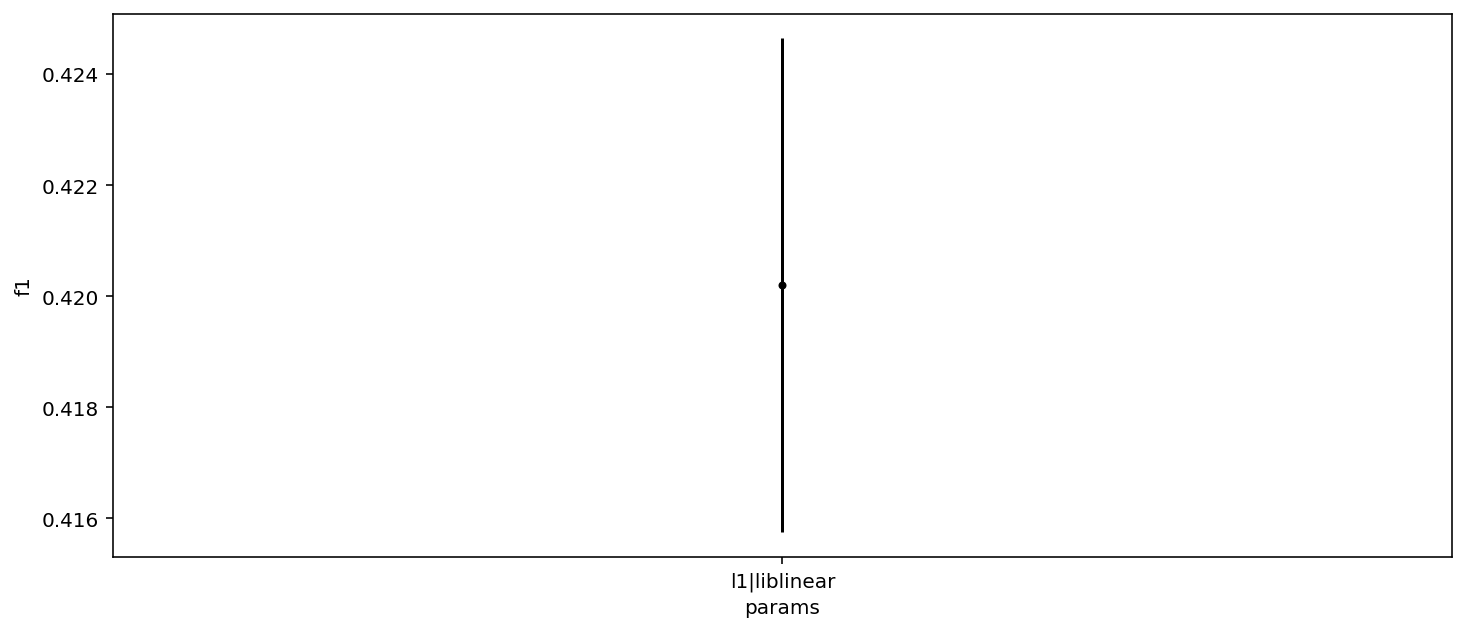

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import plot_confusion_matrix, f1_score, confusion_matrix

def plot_results(gridsearchcv):
    params = gridsearchcv.cv_results_["params"]
    ys = gridsearchcv.cv_results_["mean_test_score"]
    xs = ['|'.join(str(v) for v in param.values()) for param in params]
    yerr = gridsearchcv.cv_results_["std_test_score"]
    plt.errorbar(xs, ys, yerr / np.sqrt(gridsearchcv.cv), fmt='.k')
    plt.ylabel("f1")
    plt.xlabel("params")
    
def check_for_convergence(gridsearchcv):
    return gridsearchcv.best_estimator_.steps[-1][1].n_iter_ < gridsearchcv.best_estimator_.steps[-1][1].max_iter


np.random.seed(31415) 

scaler = StandardScaler()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logistic = LogisticRegression() # first step

# YOUR CODE HERE

pipe = Pipeline(steps=[("scaler", scaler), ("imputer", imp), ("logistic", logistic)])

# you don't need to modify the max_iter param. If you do, keep it under 1000
# hint, prefix your param names with logistic__ to pass it to the logistic step

# this grid when passed to the gridsearch will make a logistic regression 
# if you add more to the param_grid you can compare differnt models and see their IQR
param_grid = { 
    "logistic__solver" : ['liblinear'], # use one algo from here it needs to be l1 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
    "logistic__penalty" : ['l1'] # TA recommends using the l1 penalty 
}

# YOUR CODE HERE

# use f1_micro for scoring
# use 7 folds
gscv = GridSearchCV(pipe, param_grid, scoring = 'f1_micro', cv=7) # GridSearchCV(...)

# YOUR CODE HERE


gscv.fit(X_train, y_train)

plot_results(gscv)

# Next steps:

- More EDA with regard to interactions of features and target variable
- Tune KNN with GridSearchCV
- Try decision trees and logistic regression (high explainability, would be interesting)
- Try neural networks to see how accurate we can get
- Analyze misclassification rates within each category